In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import sparse
from scipy.sparse.linalg import spsolve
from tqdm import tqdm

In [37]:
def baseline_algo(y, lam, p, niter=10):
    L = len(y)
    D = sparse.diags([1, -2, 1], [0, -1, -2], shape=(L, L-2))
    D = lam * D.dot(D.transpose())
    w = np.ones(L)
    W = sparse.spdiags(w, 0, L, L)
    for i in range(niter):
        W.setdiag(w)
        Z = W + D
        z = spsolve(Z, w*y)
        w = p * (y > z) + (1-p) * (y < z)
    return z

def baseline_correction(current):
    split = 10000
    array = []
    for n in tqdm(range(0, len(current))):
        if n % split == 0:
            segment = current[n:n+split]
            baseline = baseline_algo(segment, 1000, 0.05)
            new_segment = segment - baseline
            array.append(new_segment)
    return array

In [38]:
file = pd.read_excel('xiaoyi data.xlsx')
data = file['intensity'][0:240000]
data_baseline = np.array(baseline_correction(data))
data_baseline = data_baseline.ravel()

100%|███████████████████████████████████████████████████████████████████████| 240000/240000 [00:05<00:00, 43774.48it/s]


# Original Data

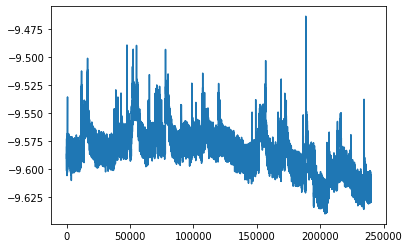

In [39]:
plt.plot(data)

# Baseline Corrected

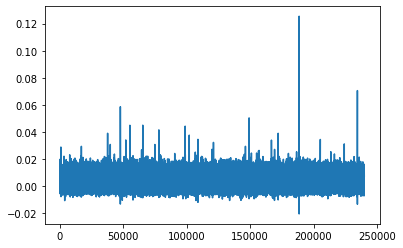

In [40]:
plt.plot(data_baseline)

# Output to CSV

In [44]:
new_file = pd.DataFrame({'baseline_corrected': data_baseline})
new_file.to_csv('baseline_corrected.csv')